Data has been scraped. Let's clean it up. Once cleaned, the data can be used for analysis.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_games = pd.read_csv('/Volumes/GoogleDrive/My Drive/Python Projects/scrapy_isthereanydeal/isthereanydeal/isthereanydeal/items.csv')

In [3]:
# Remove first two rows.. First row was a test and second row is header
df_games.drop([0,1], inplace=True)

In [4]:
df_games = df_games.reset_index().drop(labels='index',axis=1)

In [5]:
# Create rows new rows for each column
# Turn each cell into a list
df_games

,game_actual_price,game_date,game_regular_price,game_store_name,game_title
0,"$19.99,$39.99,$19.99,$39.99,$19.99,$20.99,$23....","2021-02-10 16:55 ,2021-01-05 19:55 ,2020-12-22...","$59.99,$39.99,$39.99,$39.99,$39.99,$59.99,$47....","GamesPlanet US ,2game,Adventure Shop,AllYouPla...","<h1 id=""gameTitle""><a href=""/game/nierautomata..."
1,"$17.99,$44.99,$17.99,$44.99,$17.99,$44.99,$17....","2021-11-22 15:02 ,2021-11-03 15:37 ,2021-10-27...","$44.99,$44.99,$44.99,$44.99,$44.99,$44.99,$44....","Steam,GOG ,2game,Adventure Shop,AllYouPlay,Ama...","<h1 id=""gameTitle""><a href=""/game/divinityorig..."
2,"$4.99,$4.99,$9.99,$9.99,$4.99,$4.99,$9.99,$9.9...","2021-11-26 15:25 ,2021-11-18 19:18 ,2021-11-03...","$9.99,$9.99,$9.99,$9.99,$9.99,$9.99,$9.99,$9.9...","Steam,Steam,2game,Adventure Shop,AllYouPlay,Am...","<h1 id=""gameTitle""><a href=""/game/terraria/inf..."
3,"$31.49,$31.49,$31.49,$29.74,$31.49,$34.99,$31....","2021-11-26 15:25 ,2021-11-24 19:40 ,2021-11-23...","$34.99,$34.99,$34.99,$34.99,$34.99,$34.99,$34....","Fanatical ,Fanatical ,2game,Adventure Shop,All...","<h1 id=""gameTitle""><a href=""/game/rimworld/inf..."
4,"$11.99,$8.99,$14.99,$11.99,$14.99,$8.99,$14.99...","2021-11-26 15:25 ,2021-11-24 22:13 ,2021-11-01...","$14.99,$14.99,$14.99,$14.99,$14.99,$14.99,$14....","Steam,Steam,2game,Adventure Shop,AllYouPlay,Am...","<h1 id=""gameTitle""><a href=""/game/stardewvalle..."
...,...,...,...,...,...
491,"$4.49,$4.49,$4.49,$29.99,$25.19,$29.99,$29.99,...","2021-11-26 15:25 ,2021-11-24 20:22 ,2021-11-22...","$29.99,$29.99,$29.99,$29.99,$29.99,$29.99,$29....","GreenManGaming ,Fanatical ,2game,Adventure Sho...","<h1 id=""gameTitle""><a href=""/game/everspace/in..."
492,"$0.99,$1.99,$1.99,$0.99,$8.49,$8.49,$0.79,$1.1...","2021-11-26 15:25 ,2021-11-26 09:10 ,2021-11-26...","$9.99,$19.95,$19.95,$9.99,$9.99,$56.60,$9.99,$...","GOG ,Fanatical ,2game,Adventure Shop,AllYouPla...","<h1 id=""gameTitle""><a href=""/game/deponia/info..."
493,"$4.99,$4.49,$19.99,$4.99,$19.99,$4.65,$5.00,$1...","2021-11-24 19:21 ,2021-11-24 17:20 ,2021-11-01...","$19.99,$19.99,$19.99,$19.99,$19.99,$19.99,$19....","IndieGala Store ,IndieGala Store ,2game,Advent...","<h1 id=""gameTitle""><a href=""/game/residentevil..."
494,"$5.00,$4.99,$4.99,$4.39,$4.50,$3.99,$4.99,$19....","2021-11-25 03:55 ,2021-11-24 19:37 ,2021-11-24...","$19.99,$19.99,$19.99,$19.99,$19.99,$19.99,$19....","AllYouPlay ,Newegg ,2game,Adventure Shop,AllYo...","<h1 id=""gameTitle""><a href=""/game/yakuza0/info..."


In [6]:
# Expand each column's cell into its own row, separated by commas, and get rid of any extra spaces
game_actual_price = df_games.game_actual_price.str.split(',').explode('game_actual_price').str.strip()
game_date = df_games.game_date.str.split(',').explode('game_date').str.strip()
game_regular_price = df_games.game_regular_price.str.split(',').explode('game_regular_price').str.strip()
game_store_name = df_games.game_store_name.str.split(',').explode('game_store_name').str.strip()
game_title = df_games.game_title.str.split(',').explode('game_title').str.strip()

In [7]:
# Check count of each column.. They should all match
print(f'game_actual_price length: {len(game_actual_price)}')
print(f'game_date length: {len(game_date)}')
print(f'game_regular_price length: {len(game_regular_price)}')
print(f'game_store_name length: {len(game_store_name)}')
print(f'game_title length: {len(game_title)}')

# game_store_name has more rows than expected.. let's investigate
# game_title can be checked by seeing the count for each row in df_games and duplicating game count accordingly

game_actual_price length: 355136
game_date length: 355136
game_regular_price length: 355136
game_store_name length: 390675
game_title length: 502


In [8]:
# scraper picked up 65 stores.. From Video Game Sales Price History Data-prep, there should only be 35 stores
game_store_name.value_counts()

Steam               47003
Fanatical           41538
Humble Store        28508
GamesPlanet UK      22471
GamesPlanet FR      20777
                    ...  
Digital Download      494
GameTap               494
Oculus Store          494
Playism               494
Gemly                 494
Name: game_store_name, Length: 65, dtype: int64

In [9]:
# Importing stores csv and comparing what's different
df_stores = pd.read_csv('isthereanydeals_stores.csv')

# Converting stores to df to run check
historical_stores = np.array(game_store_name.unique())
df_historical_stores = pd.DataFrame(historical_stores, columns = ['stores_title'])

# Uppercase all to normalize and make for more encompassing joins
df_stores.stores_title = df_stores.stores_title.str.upper()
df_historical_stores.stores_title = df_historical_stores.stores_title.str.upper()

# Merge
df_stores_merge = pd.merge(df_historical_stores, 
                           df_stores, 
                           how='left', 
                           on='stores_title', 
                           indicator=True, 
                           validate=None)

In [10]:
# Let's see the non-matches
df_stores_merge.loc[df_stores_merge._merge != 'both'].sort_values(by='stores_title')

,stores_title,stores_id,_merge
2,ADVENTURE SHOP,NaN,left_only
5,BI STORE,NaN,left_only
7,CHRONO.GG,NaN,left_only
8,COINPLAY.IO,NaN,left_only
10,DESURA,NaN,left_only
11,DIGITAL DOWNLOAD,NaN,left_only
13,DISCORD STORE,NaN,left_only
14,DOTEMU,NaN,left_only
15,DREAMGAME,NaN,left_only
19,FUNSTOCK DIGITAL,NaN,left_only


In [11]:
# Count prices for each game
games_count = df_games.game_actual_price.str.split('[,](?!\s)').apply(pd.Series)

# Count number of stores for each game
stores_count = df_games.game_store_name.str.split('[,](?!\s)').apply(pd.Series)

# Create a new column for each row and count all non-NaNs
games_count['count'] = [sum(games_count.loc[row].isnull()==False) for row in range(games_count.shape[0])]
stores_count['count'] = [sum(stores_count.loc[row].isnull()==False) for row in range(stores_count.shape[0])]

# See where count does not match up
count_merge = pd.merge(games_count['count'], 
                       stores_count['count'], 
                       how='inner', 
                       left_index=True, 
                       right_index=True, 
                       sort=False, 
                       suffixes=('_games', '_stores'), 
                       indicator=True)

In [12]:
count_merge['difference'] = count_merge.count_stores - count_merge.count_games
count_merge['difference'].value_counts()

72    466
71     27
0       2
70      1
Name: difference, dtype: int64

In [13]:
count_merge.loc[count_merge.difference < 72].sort_values(by='difference')

,count_games,count_stores,_merge,difference
186,0,0,both,0
235,0,0,both,0
123,1,71,both,70
0,204,275,both,71
393,15,86,both,71
389,138,209,both,71
383,201,272,both,71
381,237,308,both,71
379,329,400,both,71
368,682,753,both,71


In [14]:
# Show where the NaN does not occur after a list of values

In [15]:
game_stores_name_clean = []
# Loop through each row to create new list
for row in range(count_merge.shape[0]):
    # Starting index of the stores list.. The first few are irrelevant
    min_id = count_merge.loc[row].difference

    # Serves as the max index of the stores list before there are nulls
    max_id = stores_count.loc[row].transpose().isnull().idxmax()

    # It all comes together
    stores_id = stores_count.loc[row][min_id:max_id]
    
    # Expected count. If non-match, drop the row
    games_count_id = count_merge.loc[row].count_games
    if stores_id.shape[0] != games_count_id:
        df_games.drop([row], axis=0, inplace=True)
        print(f'Non-match:\n{count_merge.loc[row]}\n min_id={min_id}, max_id={max_id}\n {stores_id.shape[0]}, {games_count_id}')
    else:    
        # Become a list
        stores_id = stores_id.tolist()
        # Append to list
        game_stores_name_clean.append(stores_id)

Non-match:
count_games     2767
count_stores    2839
_merge          both
difference        72
Name: 58, dtype: object
 min_id=72, max_id=0
 0, 2767


In [16]:
df_games['game_stores_name_clean'] = game_stores_name_clean

In [17]:
# Find length of the cleaned game_stores_name
game_stores_name_clean_len = 0
for row in df_games.game_stores_name_clean:
    game_stores_name_clean_len += len(row)

In [18]:
# Expand each column's cell into its own row, separated by commas, and get rid of any extra spaces
game_actual_price = df_games.game_actual_price.str.split(',').explode('game_actual_price').str.strip()
game_date = df_games.game_date.str.split(',').explode('game_date').str.strip()
game_regular_price = df_games.game_regular_price.str.split(',').explode('game_regular_price').str.strip()
game_store_name = df_games.game_store_name.str.split(',').explode('game_store_name').str.strip()
game_title = df_games.game_title.str.split(',').explode('game_title').str.strip()

# Check count of each column.. They should all match
print(f'game_actual_price length: {len(game_actual_price)}')
print(f'game_date length: {len(game_date)}')
print(f'game_regular_price length: {len(game_regular_price)}')
print(f'game_store_name length: {len(game_store_name)}')
print(f'game_title length: {len(game_title)}')
print(f'game_stores_name_clean length: {game_stores_name_clean_len}')

game_actual_price length: 352369
game_date length: 352369
game_regular_price length: 352369
game_store_name length: 387836
game_title length: 501
game_stores_name_clean length: 352367


In [19]:
# Count length in each index
df_games['game_actual_price_count'] = [len(row) for row in df_games.astype(str).game_actual_price.str.split(',')]
df_games['game_stores_name_clean_count'] = [len(row) for row in df_games.game_stores_name_clean]

In [20]:
df_games.loc[df_games.game_actual_price_count != df_games.game_stores_name_clean_count]

,game_actual_price,game_date,game_regular_price,game_store_name,game_title,game_stores_name_clean,game_actual_price_count,game_stores_name_clean_count
186,NaN,NaN,NaN,NaN,"<h1 id=""gameTitle""><a href=""/game/dotaiitest/i...",[],1,0
235,NaN,NaN,NaN,NaN,"<h1 id=""gameTitle""><a href=""/game/psychonautsd...",[],1,0


No historical prices.. This can be ommitted since it will not affect model

In [21]:
# Drop rows where there is no historical price
df_games.dropna(axis=0, 
                how='all', 
                subset=['game_actual_price', 'game_date', 'game_regular_price', 'game_store_name'], 
                inplace=True)

In [22]:
# Turn each column into a list
df_games['game_actual_price_clean'] = df_games.astype(str).game_actual_price.str.split(',')
df_games['game_date_clean'] = df_games.astype(str).game_date.str.split(',')
df_games['game_regular_price_clean'] = df_games.astype(str).game_regular_price.str.split(',')

In [23]:
# Keep only game title names and id in new column and multiply x times (based on count from historical sales prices)
df_games['game_title_id'] = df_games['game_title'].str.rsplit('/info', 1).str.get(0).str.replace('<h1 id="gameTitle"><a href="/game/','')

In [24]:
# Reset index to run through loop
df_games.reset_index(drop=True, inplace=True)

game_title_id_clean = []
for row in range(df_games.shape[0]):
    multiplier = df_games.game_actual_price_count[row]
    # Add comma as seperator, multiply x times, remove last character (comma), and turn into list
    game_title_id_clean.append(((df_games.game_title_id[row] + ',') * multiplier)[:-1].split(','))

# Create new columns
df_games['game_title_id_clean'] = game_title_id_clean

In [25]:
# Transpose each column

# Check to make sure length matches
print(f"game_title_id_clean length: {df_games.explode('game_title_id_clean')['game_title_id_clean'].shape[0]}")
# print(f"game_title_name_clean length: {df_games.explode('game_title_name_clean')['game_title_name_clean'].shape[0]}")
print(f"game_regular_price_clean length: {df_games.explode('game_regular_price_clean')['game_regular_price_clean'].shape[0]}")
print(f"game_actual_price_clean length: {df_games.explode('game_actual_price_clean')['game_actual_price_clean'].shape[0]}")
print(f"game_stores_name_clean length: {df_games.explode('game_stores_name_clean')['game_stores_name_clean'].shape[0]}")
print(f"game_date_clean length: {df_games.explode('game_date_clean')['game_date_clean'].shape[0]}")

# Matches

# Explode
game_title_id_clean_explode = df_games.explode('game_title_id_clean')['game_title_id_clean'].reset_index(drop=True)
# game_title_name_clean_explode = df_games.explode('game_title_name_clean')['game_title_name_clean'].reset_index(drop=True)
game_regular_price_clean_explode = df_games.explode('game_regular_price_clean')['game_regular_price_clean'].reset_index(drop=True)
game_actual_price_clean_explode = df_games.explode('game_actual_price_clean')['game_actual_price_clean'].reset_index(drop=True)
game_stores_name_clean_explode = df_games.explode('game_stores_name_clean')['game_stores_name_clean'].reset_index(drop=True)
game_date_clean_explode = df_games.explode('game_date_clean')['game_date_clean'].reset_index(drop=True)


game_title_id_clean length: 352367
game_regular_price_clean length: 352367
game_actual_price_clean length: 352367
game_stores_name_clean length: 352367
game_date_clean length: 352367


In [26]:
# Create new dataframe from the new columns
data = {'game_title_id': game_title_id_clean_explode,
        'game_regular_price': game_regular_price_clean_explode,
        'game_actual_price': game_actual_price_clean_explode,
        'game_stores_name': game_stores_name_clean_explode,
        'game_date': game_date_clean_explode}
df_hist = pd.DataFrame(data)

In [27]:
# Import to create game title id and name match
df_game_match = pd.read_csv('df_game_match.csv')

# Merge and drop plain_game column
df_hist_merge = pd.merge(df_hist, df_game_match, how='inner', left_on='game_title_id', right_on='stores_id').drop('stores_id', axis=1)

# Check to make sure merge was ok
print(f'Blank values columns:\n{df_hist_merge.isnull().sum()} \n') # should be 0
print(f'Row count match?: {df_hist_merge.shape[0] == df_hist.shape[0]}') # should be True

Blank values columns:
game_title_id         0
game_regular_price    0
game_actual_price     0
game_stores_name      0
game_date             0
stores_title          0
dtype: int64 

Row count match?: True


In [28]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Data is cleaned!

In [29]:
df_hist_merge

,game_title_id,game_regular_price,game_actual_price,game_stores_name,game_date,stores_title
0,nierautomata,$59.99,$19.99,DLGamer,2021-02-10 16:55,NieR: Automata
1,nierautomata,$39.99,$39.99,Steam,2021-01-05 19:55,NieR: Automata
2,nierautomata,$39.99,$19.99,Steam,2020-12-22 20:05,NieR: Automata
3,nierautomata,$39.99,$39.99,Steam,2020-10-07 19:21,NieR: Automata
4,nierautomata,$39.99,$19.99,Steam,2020-09-23 19:21,NieR: Automata
...,...,...,...,...,...,...
352362,thisispolice,$16.83,$15.14,GamesPlanet FR,2016-08-02 18:15,This Is the Police
352363,thisispolice,$18.63,$16.76,GamesPlanet UK,2016-08-02 18:14,This Is the Police
352364,thisispolice,$16.83,$15.14,GamesPlanet DE,2016-08-02 18:13,This Is the Police
352365,thisispolice,$14.99,$13.49,GOG,2016-08-02 18:03,This Is the Police


Method 1 (Each store is independent from each other):
Break up each game into each store name and run a ML on each game's store. Take the soonest date out all the segments to determine next sale

Method 2 (Stores check on each other for sales):


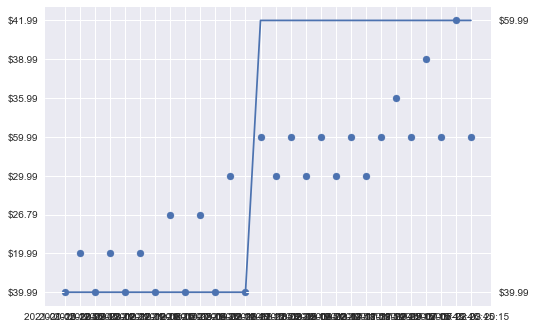

In [30]:
plt.style.use('seaborn')

fig,ax=plt.subplots()

ax.scatter(df_hist_merge.loc[(df_hist_merge.game_title_id == 'nierautomata') & (df_hist_merge.game_stores_name == 'Steam')]['game_date'],
        df_hist_merge.loc[(df_hist_merge.game_title_id == 'nierautomata')  & (df_hist_merge.game_stores_name == 'Steam')]['game_actual_price'])

ax2=ax.twinx()

ax2.plot(df_hist_merge.loc[(df_hist_merge.game_title_id == 'nierautomata') & (df_hist_merge.game_stores_name == 'Steam')]['game_date'],
              df_hist_merge.loc[(df_hist_merge.game_title_id == 'nierautomata')  & (df_hist_merge.game_stores_name == 'Steam')]['game_regular_price'])

plt.show()